# d) Desarrollo de procesamiento de NLP (procesamiento de lenguaje nativo)

las siguientes células de código contienen la metodología empleada para la limpieza y el pre procesamiento de texto para poder realizar el procesamiento de lenguaje, el resultado de este ejercicio es la síntesis de una base de metadata procesada al idioma español la cual será la base de nuestro modelo de entrenamiento, dentro de las herramientas que se emplearon para la obtención de datos  se generó un pipeline específico para poder categorizar las etiquetas de los videos así como el nombre de los canales. de esta manera los usuarios podrán encontrar de una forma sencilla las correlaciones que existen entre su canal y el de otros creadores de contenido, y podrán utilizar esta información para mejorar su posicionamiento

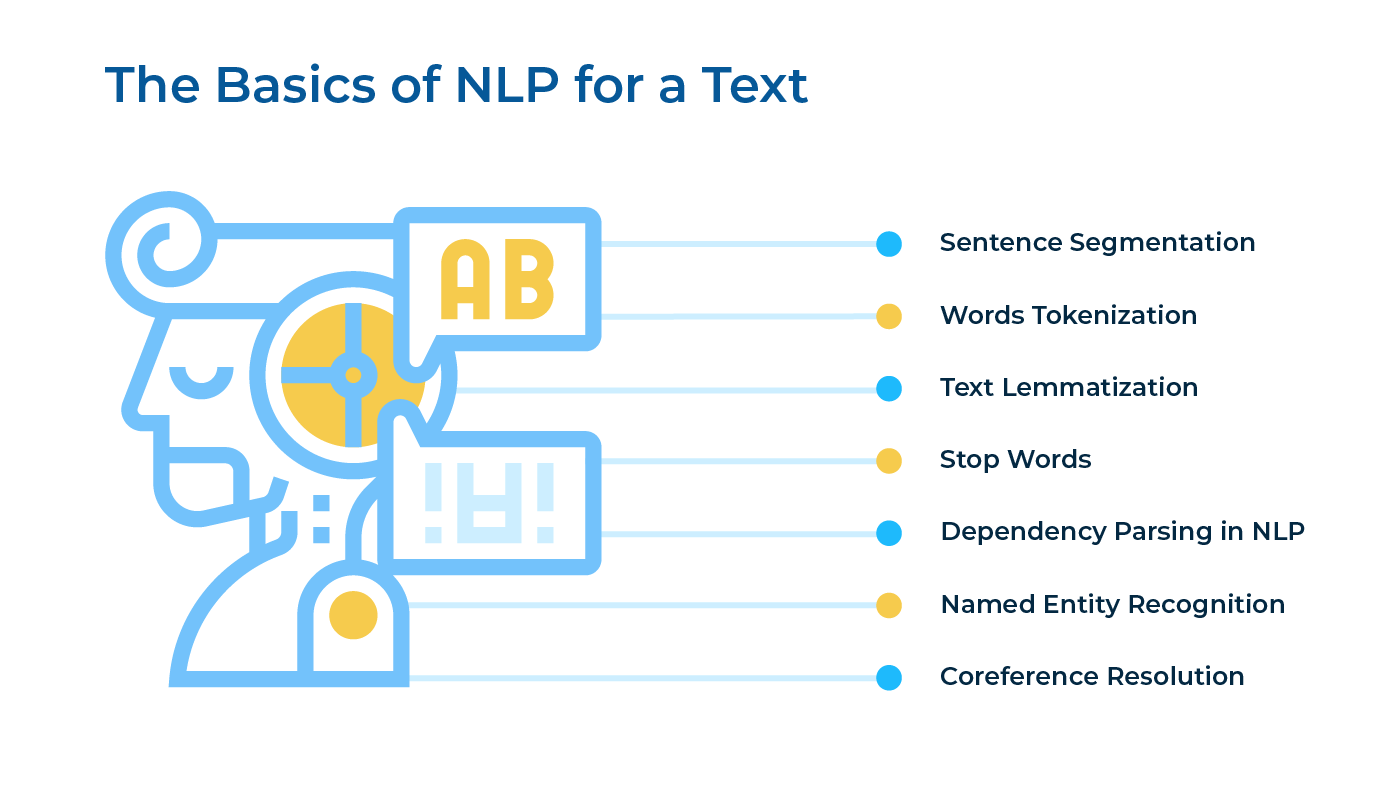
Se adjunta la documentación de las librerías empleadas en esta libreta:
https://spacy.io/
https://scikit-learn.org/stable/index.html


In [44]:
df = pd.read_csv('C:/Users/qsavy_1/CCD/ccd_meta/video_data_final.csv')
df = df[['channelTitle','tags', 'viewCount', 'publishedAt','pushblishDayName']]
df

,channelTitle,tags,viewCount,publishedAt,pushblishDayName
0,ElTrollino,['roblox'],819935.0,2022-07-28T18:15:03Z,NaN
1,ElTrollino,['minecraft'],3900502.0,2022-06-18T20:45:18Z,NaN
2,ElTrollino,['escondite'],2827316.0,2022-06-10T18:54:53Z,NaN
3,ElTrollino,['roblox'],2692418.0,2022-06-04T18:20:42Z,NaN
4,ElTrollino,['minecraft'],4171162.0,2022-05-28T18:00:16Z,NaN
...,...,...,...,...,...
2378,German,NaN,109804.0,2022-01-05T04:30:09Z,NaN
2379,German,"['german garmendia', 'musica', 'pop', 'pop hit...",2040533.0,2020-12-17T21:00:10Z,NaN
2380,German,"['german garmendia', 'musica', 'canciones', 'p...",5487331.0,2020-09-23T21:00:10Z,NaN
2381,German,"['german garmendia', 'german', 'garmendia', 'm...",6483164.0,2020-03-31T22:00:10Z,NaN


In [50]:
tag_class = df['tags'].astype (str)
tag_list = tag_class.values.tolist()
tag_str = ''.join(tag_list)
tag_clean = re.sub(pattern = '[...]',
repl = "",
string = tag_str)


In [51]:
from spacy.matcher import Matcher
nlp = spacy.load('es_core_news_md')

matcher = Matcher(nlp.vocab)
pattern = [
          {'ORTH': "'"},
          {'POS':'PROPN', 'OP':'+'},
          {'ORTH': "'"},
          ] 
matcher.add('PEOPER_NOUNS', [pattern], greedy='LONGEST')
doc_tags = nlp(tag_clean)
matches = matcher(doc_tags)
matches.sort(key = lambda x: x[1])
print(len(matches))
for match in matches[:10]:
    print(match, doc_tags[match[1]:match[2]])

8022
(18135987400277701921, 53, 57) 'pk xd'
(18135987400277701921, 66, 69) 'mikecrack'
(18135987400277701921, 90, 93) 'mikecrack'
(18135987400277701921, 106, 109) 'Reto'
(18135987400277701921, 110, 113) 'Challenge'
(18135987400277701921, 166, 170) 'pk xd'
(18135987400277701921, 223, 226) 'mikecrack'
(18135987400277701921, 256, 259) 'mikecrack'
(18135987400277701921, 269, 272) 'mikecrack'
(18135987400277701921, 1839, 1843) 'jason voorhees'


In [52]:
channels = df.channelTitle.tolist()

In [53]:
nlp = spacy.blank('en')
ruler = nlp.add_pipe('entity_ruler')
patterns =[]
for tag in doc_tags:
    patterns.append({'label': 'video_tag', 'pattern': tag})
for channel in channels:
    patterns.append({'label': 'YT_channel', 'pattern':channel})
ruler.add_patterns(patterns)

In [54]:
print(doc_tags[:10])

['roblox']['minecraft']['escondite']['roblox']['minecraft']['escondite']['los compas', 'eltrollino',


In [55]:
df_comments = pd.read_csv('C:/Users/qsavy_1/CCD/ccd_meta/comments_data_final.csv')
df_comments.head()

,video_id,comments,comments_no_stopwords
0,uCqLtZhf8xw,['Trollino por fin azes vídeos te echaba de me...,NaN
1,xkQKH6-uNyE,['Me gusta que todos nos unimos en comunidad!'...,NaN
2,MWNpBHATT-w,['Cuando me piden comida yo voy a decir: ¡Trol...,NaN
3,6Qg_FpyPY-Y,"['Si', 'Trollino siempre te alegra el día 💛', ...",NaN
4,IgNj4zJ-Tv0,"['Cierto jugar con us tedes', 'Tú videos me gu...",NaN


In [56]:
# get 1%
sample = df_comments.sample(frac=0.01)

In [62]:
comments = (sample['comments'].astype (str))
comments_list = comments.values.tolist()
all_words_str = ','.join(comments_list)


In [58]:
doc = nlp(all_words_str)
for ent in doc.ents:
    print(ent.text, ent.label_)

Venevision YT_channel
ElTrollino YT_channel
Izhan YT_channel
Campechaneando YT_channel
Cinerds YT_channel
German YT_channel
German YT_channel
La Sombra del Imperio YT_channel
Campechaneando YT_channel
German YT_channel
German YT_channel
EEG YT_channel
Los Expulsados YT_channel
German YT_channel
TheWillyrex YT_channel
La Sombra del Imperio YT_channel
Campechaneando YT_channel
German YT_channel
EEG YT_channel
Campechaneando YT_channel
Campechaneando YT_channel
CryptoYoda YT_channel
German YT_channel
German YT_channel
German YT_channel
ElTrollino YT_channel
German YT_channel
La Sombra del Imperio YT_channel
Teleantioquia YT_channel


In [ ]:
from spacy import displacy
displacy.render(doc, style='ent')

In [60]:
df_recomend = (df['pushblishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_recomend = df_recomend.reindex(weekdays)
df_recomend

Monday       34
Tuesday      47
Wednesday    44
Thursday     28
Friday       51
Saturday     34
Sunday       12
Name: pushblishDayName, dtype: int64

In [61]:
nlp1 = spacy.load('es_core_news_md')
nlp1.components

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x216156df820>),
 ('morphologizer',
  <spacy.pipeline.morphologizer.Morphologizer at 0x216156df700>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x216156e0cf0>),
 ('senter', <spacy.pipeline.senter.SentenceRecognizer at 0x216477ea800>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x216156e8ac0>),
 ('lemmatizer', <spacy.lang.es.lemmatizer.SpanishLemmatizer at 0x216158cb740>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x216156e0ba0>)]

# g) Desarrollo de machine learning para generación de modelos predictivos:

este es el desarrollo de nuestro modelo de análisis de sentimiento a través de procesamiento de lenguaje nativo, la metodología que se utilizó para entrenar el modelo fue la siguiente:
a través del pipeline que nos ofrece la librería de spacy se tomó una muestra de 10% del contenido minado > 36,000 comentarios la cual se proceso en el modelo de lenguaje español es_core_news_md, con el cual se generó un token por cada palabra, se removió la puntuación y  los ‘stopwords’ las cuales son palabras que no aportan ningún contexto al contenido y hacen los procesos de cómputo más lentos. Una vez generados los tokens por palabra se vectorizaron las palabras  para buscar correlaciones en palabras individuales entre las mismas.

Se decidió omitir del reporte ejercicios tediosos que tienen el propósito de limpiar las bases de datos, no obstante,  toda la metodología de limpieza y preprocesamiento del lenguaje esta archivada en nuestro github https://github.com/metacubeccd/CCD, esto con la intencion de entregar un reporte concreto. 


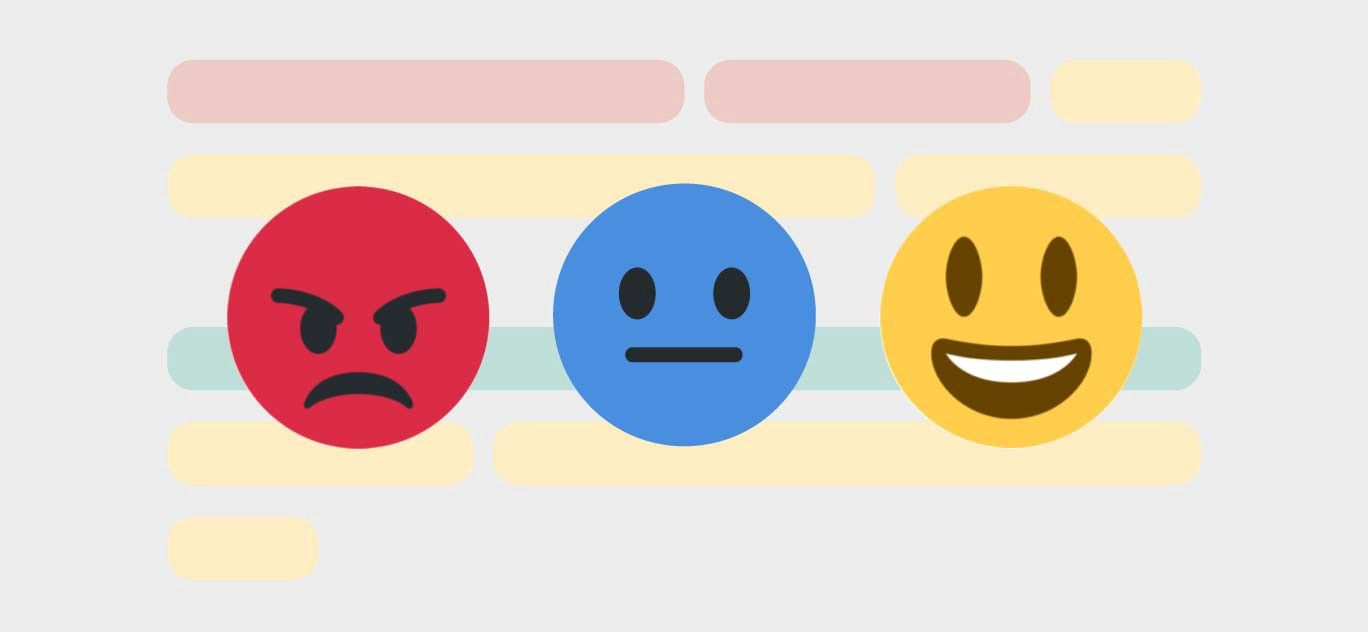

Durante el desarrollo del proyecto uno de los problemas más grandes que se presentaron, fue la ausencia de bases de datos con objetivos validados para entrenar nuestro algoritmo, y nos fue evidente la escasez de desarrollo en procesamiento de lenguaje nativo en español, la forma en la que se resolvió el problema fue a través de la generación de etiquetado a lemmatizaciones (raíces de palabra) con entidades positivas, negativas y neutrales las cuales finalmente le otorgaron una calificación a cada comentario. y una vez que se le otorgó ese índice de sentimiento al 10% de la muestra se entrenó un modelo de regresión lineal mismo que fue utilizado para interpretar el analisis de sentimiento del 90% restante de la base de datos.


In [41]:
import spacy
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from spacytextblob.spacytextblob import SpacyTextBlob
from ast import literal_eval

In [2]:
df1 = pd.read_csv('C:/Users/qsavy_1/CCD/ccd_meta/kaggle/watson_trained/kaggle_ready.csv')
df_nlp = df1[['comments','sentiment']]

In [40]:
df_nlp['comments']

0                                             Súper canelo
1                                                    Súper
2        CANELO A DE SER DEL PRI SOLO SABE ROBAR Y HACE...
3        Hace rato se aventaron un tiro aquí en mi barr...
4                                        Boxeo decadente..
                               ...                        
36758    Que boludez es competencia no baile jaja y esa...
36759                Vamos combatientes a ganar hoy 😍😍😍❤️💚
36760    NOMÁS LES DIGO, VALE LA PENA CADA SEGUNDO DE E...
36761    Dinamita: de los mejóres!!!  deva o no  "impue...
36762    Un ejemplo para muchos jóvenes que empiezan un...
Name: comments, Length: 36763, dtype: object

In [4]:

# Length and Shape 
df_nlp.shape

(36763, 2)

In [5]:
# Checking for Missing Values
df_nlp.isnull().sum()

comments     611
sentiment      0
dtype: int64

In [6]:
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
nlp = spacy.load('es_core_news_md')

In [7]:
# Build a list of stopwords to use to filter
stopwords = list(STOP_WORDS)

In [ ]:
stopwords

In [9]:
docx = nlp("Exelente Muchas gracias por el contenido")

In [10]:
# Lemmatizing of tokens
for word in docx:
    print(word.text,"Lemma =>",word.lemma_)

Exelente Lemma => Exelente
Muchas Lemma => mucho
gracias Lemma => gracia
por Lemma => por
el Lemma => el
contenido Lemma => contenido


In [11]:
# Lemma that are not pronouns
for word in docx:
    if word.lemma_ != "-PRON-":
        print(word.lemma_.lower().strip())

exelente
mucho
gracia
por
el
contenido


In [12]:
# List Comprehensions of our Lemma
[word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in docx]

['exelente', 'mucho', 'gracia', 'por', 'el', 'contenido']

In [13]:
# Filtering out Stopwords and Punctuations
for word in docx:
    if word.is_stop == False and not word.is_punct:
#     if word.is_stop != True and not word.is_punct:
        print(word)

Exelente
gracias
contenido


In [14]:
# Stop words and Punctuation In List Comprehension
[ word for word in docx if word.is_stop == False and not word.is_punct ]

[Exelente, gracias, contenido]

In [15]:
# Use the punctuations of string module
import string
punctuations = string.punctuation

In [16]:
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
# Creating a Spacy Parser
from spacy.lang.es import Spanish
parser = Spanish()

In [18]:
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords]
    # mytokens = [ word for word in mytokens if word not in punctuations]
    return mytokens

## Entrenamiento de modelo predictivo de analisis de sentimientos:
Las células inferiores buscan la metadata generada en nuestro modelo, limpian el contenido del texto y dividen la base de datos en un train, test split, en el cual se toma el 80%  X que es el contenido de los comentarios y el 80% de Y, el cual es la calificación de cada comentario, y hacen una matriz de correlación entre el contenido de los comentarios, posteriormente hacen una matriz de confusión para determinar delimitar positivos verdaderos y falsos positivos y finalmente con la información obtenida hacer una prediccion del 20% restante de la muestra o el ‘test’ dataset.
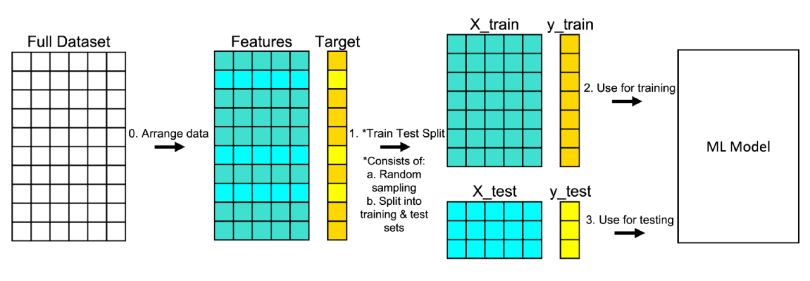

In [19]:
# ML Packages
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score 
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [20]:
#Custom transformer using spaCy 
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

# Basic function to clean the text 
def clean_text(text):     
    return text.strip().lower()

In [21]:
# Vectorization
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1)) 
classifier = LinearSVC()

In [22]:
# Using Tfidf
tfvectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [23]:
# Splitting Data Set
from sklearn.model_selection import train_test_split

In [24]:
# Features and Labels
X = df_nlp['comments'].astype(str)
ylabels = df_nlp['sentiment'].astype(int)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=42)

In [26]:
# Create the  pipeline to clean, tokenize, vectorize, and classify 
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])

In [27]:
# Fit our data
pipe.fit(X_train,y_train)

C:\Users\qsavy_1\.conda\envs\scraper\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('cleaner', <__main__.predictors object at 0x00000216425C3010>),
                ('vectorizer',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x00000216316F4DC0>)),
                ('classifier', LinearSVC())])

In [28]:
# Predicting with a test dataset
sample_prediction = pipe.predict(X_test)

# h) Reporte de Desarrollo de API para cada algoritmo desarrollado a través de inteligencia artificial:

El siguiente bloque de células genera predicciones en base a nuestro algoritmo, para determinar la precisión de nuestro modelo, este es el modelo que subiremos a la página web y será el encargado de evaluar la retroalimentación que reciben los creadores de contenido a través de los comentarios. Esto nos permitirá ayudar al usuario a determinar modificaciones en la forma en la que se presenta el contenido al público,  junto con el resto de herramientas que desarrollamos podremos tener una mejor idea de las formas en las que se mejorará el contenido del canal para mantener a la audiencia cautiva así como  ampliar el espectro de su comunidad e incrementar el tiempo de visualización.

Los outputs de las células de código determinan la precisión ‘Accuracy’ donde 1.0 es igual al 100%, en las células donde se encuentran 2 líneas con una entrega de precisión, la primera determina el resultado de nuestro algoritmo, y la segunda demuestra un 1.0 o 100%, y es la forma en la que autoevaluamos el modelo.


In [ ]:
# Prediction Results
# 1 = Positive review
# 0 = Negative review
for (sample,pred) in zip(X_test,sample_prediction):
    print(sample,"Prediction=>",pred)

In [30]:
# Accuracy
print("Accuracy: ",pipe.score(X_test,y_test))
print("Accuracy: ",pipe.score(X_test,sample_prediction))

Accuracy:  0.9503603971168231
Accuracy:  1.0


In [31]:
# Accuracy
print("Accuracy: ",pipe.score(X_train,y_train))

Accuracy:  0.952669160149609


In [32]:
# Another random review
pipe.predict(["This was a great movie"])

array([0])

In [43]:
example = ["me gusta mucho el contenido de este canal",
 "estoy harto de que sigan hablando de esto",
 "me encanta esta cancion"]

In [34]:
pipe.predict(example)


array([0, 0, 0])

In [35]:
# Create the  pipeline to clean, tokenize, vectorize, and classify 
pipe_tfid = Pipeline([("cleaner", predictors()),
                 ('vectorizer', tfvectorizer),
                 ('classifier', classifier)])

In [36]:
pipe_tfid.fit(X_train,y_train)


Pipeline(steps=[('cleaner', <__main__.predictors object at 0x000002164261BAC0>),
                ('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x00000216316F4DC0>)),
                ('classifier', LinearSVC())])

In [37]:
sample_prediction1 = pipe_tfid.predict(X_test)


In [ ]:
for (sample,pred) in zip(X_test,sample_prediction1):
    print(sample,"Prediction=>", pred)

In [39]:
print("Accuracy: ",pipe_tfid.score(X_test,y_test))
print("Accuracy: ",pipe_tfid.score(X_test,sample_prediction1))

Accuracy:  0.9503603971168231
Accuracy:  1.0
